# 1 - Prepare the data <a id='p1'></a>

Original challenge data, as found at https://www.crowdai.org/challenges/lifeclef-2019-bird-recognition.

In [1]:
! tree /home/jul/data/birdclef2019/ -L 2 -I phaunos

/home/jul/data/birdclef2019/
├── custom_subsets
│   ├── subset_1568996896
│   ├── subset_1569569541
│   ├── subset_1569850811
│   ├── subset_1569852109
│   ├── subset_1569852139
│   └── subset_1571236260
├── train
│   ├── additional_metadata
│   ├── audio
│   ├── BirdCLEF2019_Species_Codes_List.csv
│   ├── metadata
│   └── Pipfile
└── val
    ├── audio
    ├── BirdCLEF2019_Species_Codes_List.csv
    ├── metadata
    ├── Pipfile
    ├── script
    ├── SWAMP_Filename_Description.txt
    ├── SWAMP_Recording_Locations.png
    └── SWIFT_Recording_Unit.jpg

15 directories, 7 files


All additional data is saved in directories called "phaunos".
Audio data is resampled to 22050 Hz for faster prototyping:

In [2]:
! tree /home/jul/data/birdclef2019/train/phaunos/ -L 1 -I annotations
! tree /home/jul/data/birdclef2019/val/phaunos/ -L 1 -I annotations

/home/jul/data/birdclef2019/train/phaunos/
└── audio_wav_22050hz

1 directory, 0 files
/home/jul/data/birdclef2019/val/phaunos/
└── audio_wav_22050hz

1 directory, 0 files


## 1.1 - Generate annotation files (see [here](https://github.com/phaunos/phaunos_ml/blob/7fe9a4d07821a3ae0a5cdc353dc27fd332c5132c/phaunos_ml/utils/annotation_utils.py))

In [3]:
%load_ext autoreload
%autoreload 2
from challenge_utils.birdclef2019_utils import get_class_list, generate_train_ann_files, generate_val_ann_files

In [4]:
class_list = get_class_list('/home/jul/data/birdclef2019/train/BirdCLEF2019_Species_Codes_List.csv')

In [5]:
print(class_list)

['acafly', 'agitit1', 'aldfly', 'amakin1', 'amebit', 'amecro', 'amegfi', 'amekes', 'ameoys', 'amepip', 'amered', 'amerob', 'amewig', 'amewoo', 'amgplo', 'amtspa', 'anbtyr1', 'andeme1', 'andgua1', 'andsis1', 'anhing', 'anpowl1', 'aplfal', 'asctap1', 'azaspi1', 'babtan1', 'babwar', 'babwre1', 'bacant1', 'bacant2', 'bafibi1', 'bahtan1', 'baisan', 'baleag', 'balori', 'banana', 'banswa', 'barant1', 'barpuf1', 'barswa', 'batfal1', 'batgua1', 'batpig1', 'batsee1', 'bawswa1', 'bawwar', 'baymac', 'baywre1', 'bbctyr1', 'bbmtan1', 'bbmtou1', 'bbwduc', 'bcbeag1', 'bcmtan1', 'bcnher', 'belkin1', 'bhtfly1', 'bicant2', 'bicwre1', 'bkbcuc', 'bkbplo', 'bkbwar', 'bkcchi', 'bkcdon', 'bkfgra', 'bkmtou1', 'bknsti', 'bkpwar', 'blaant1', 'blbant1', 'blbcon1', 'blbgra1', 'blbgro2', 'blbthr1', 'blbwre1', 'blcant4', 'blchaw1', 'blchem1', 'blchum1', 'blcjay1', 'blcjay2', 'blcman1', 'blctan2', 'blctit1', 'blctyr1', 'blcwar2', 'blfant1', 'blftan1', 'blgdov1', 'blheag1', 'blhhem1', 'blhpar1', 'blhtan1', 'blkflo1', 

In [6]:
generate_train_ann_files(
    '/home/jul/data/birdclef2019/train/phaunos/audio_wav_22050hz/',
    '/home/jul/data/birdclef2019/train/metadata/',
    '/home/jul/data/birdclef2019/train/phaunos/annotations/',
    class_list)

In [7]:
# Note: some val metadata is empty (no species)
# + some is not clean: wrong time parameters or duplicates
generate_val_ann_files(
    '/home/jul/data/birdclef2019/val/phaunos/audio_wav_22050hz/',
    '/home/jul/data/birdclef2019/val/metadata/',
    '/home/jul/data/birdclef2019/val/phaunos/annotations/',
    class_list)

File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 191 and 2))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 191 and 2))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 306 and 12))
File /home/jul/data/birdclef2019/val/metadata/./LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.json: Wrong time parameters: start_time must be greater than or equal to 0 and end_time must be greater than start_time (got 306 and 12))


Annotation file contains all annotations of a given audio file. Each line represent a region and one or more label ids:
    start_time,end_time(-1 if the annotation is for the whole audio file, as in our case),label_ids (joined by '#'):

In [8]:
!head -5 /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/* | head -8

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC1133.ann <==
0.000,-1.000,4

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC127371.ann <==
0.000,-1.000,4

==> /home/jul/data/birdclef2019/train/phaunos/annotations/amebit/XC130058.ann <==
0.000,-1.000,4
head: write error: Broken pipe


In [9]:
# Note: metadata is not clean: wrong time parameters or duplicates
!head -5 /home/jul/data/birdclef2019/val/phaunos/annotations/* | head -20

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49849.ann <==
7.000,8.000,581
7.000,8.000,581
13.000,15.000,581
13.000,15.000,581
21.000,23.000,581

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49870.ann <==
1.000,3.000,81
1.000,3.000,81
2.000,4.000,81
2.000,4.000,81
3.000,5.000,81

==> /home/jul/data/birdclef2019/val/phaunos/annotations/LIFECLEF2017_BIRD_SOUNDSCAPE_WAV_RN49888.ann <==
14.000,16.000,150
14.000,16.000,150
21.000,23.000,150
21.000,23.000,150
23.000,26.000,150
head: write error: Broken pipe


## 1.2 - Create a subset for fast prototyping

In [10]:
import numpy as np
from phaunos_ml.utils.dataset_utils import create_subset, dataset_stat_per_file

ROOT_PATH = '/home/jul/data/birdclef2019/train/phaunos'

In [11]:
# Pick 10 classes randomly
subset_label_set = set(np.random.choice(range(len(class_list)), 10, replace=False))
print(subset_label_set)

{96, 544, 615, 234, 394, 269, 397, 146, 633, 541}


In [12]:
# Create a data subset with all files annotated with at least one of these classes.
subset_filename = create_subset(
    ROOT_PATH,
    ['.'],
    '/home/jul/data/birdclef2019/custom_subsets',
    audio_dirname='audio_wav_22050hz',
    label_set=subset_label_set)
print(subset_filename)

/home/jul/data/birdclef2019/custom_subsets/subset_1571239571/subset_1571239571.csv


This basically create a file with a unique name (*subset_&lt;timestamp&gt;.csv*) containing a list of files with their annotations (intersecting with label_set):

In [13]:
!head -10 "$subset_filename"

#class subset: 96,146,234,269,394,397,541,544,615,633
audio_wav_22050hz/gloflo1/XC86423.wav
audio_wav_22050hz/gloflo1/XC17521.wav
audio_wav_22050hz/gloflo1/XC82377.wav
audio_wav_22050hz/gloflo1/XC353758.wav
audio_wav_22050hz/gloflo1/XC259547.wav
audio_wav_22050hz/gloflo1/XC242566.wav
audio_wav_22050hz/gloflo1/XC91870.wav
audio_wav_22050hz/gloflo1/XC273786.wav
audio_wav_22050hz/gloflo1/XC53648.wav


In [14]:
# Show dataset stats
# Note: The total number of instances might be higher than the number of audio files because a file might have multiple labels
d_num, d_dur = dataset_stat_per_file(
    ROOT_PATH,
    subset_filename,
    audio_dirname='audio_wav_22050hz')
print("Class index, number of files, total duration (in s)") 
for k, v in sorted(d_num.items()): 
    print(f' {k:<10},{v:<10},{d_dur[k]:<10.3f}')

710it [00:00, 6100.43it/s]

Class index, number of files, total duration (in s)
 96        ,74        ,1844.904  
 146       ,100       ,4182.884  
 234       ,68        ,2513.742  
 269       ,58        ,1202.469  
 394       ,100       ,4704.259  
 397       ,100       ,4520.610  
 541       ,42        ,1085.631  
 544       ,100       ,1550.804  
 615       ,22        ,509.265   
 633       ,46        ,1384.146  


## 1.3 - Compute features and write them to [TFRecord](https://www.tensorflow.org/tutorials/load_data/tf_records) files

In [15]:
import os
from phaunos_ml.utils.feature_utils import MelSpecExtractor
from phaunos_ml.utils.dataset_utils import dataset2tfrecords
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

In [16]:
# Log-mel spectrogram in 2s examples
feature_extractor = MelSpecExtractor(n_fft=512,
                                     hop_length=128,
                                     n_mels = 128,
                                     example_duration=2,
                                     example_hop_duration=1)

In [17]:
# Process our subset. TFRecords are written in <tfrecord_path>/positive
tfrecord_path = os.path.join(os.path.dirname(subset_filename), 'features')
dataset2tfrecords(ROOT_PATH,
                 subset_filename,
                 tfrecord_path,
                 feature_extractor,
                 audio_dirname='audio_wav_22050hz')

100%|██████████| 711/711 [03:06<00:00,  3.19it/s]


## 1.4 - Check some TFRecord

In [18]:
import random
import tensorflow as tf
from phaunos_ml.utils import tf_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
subset_dir = os.path.dirname(subset_filename)
sometfrecord_path = os.path.join(
    os.path.join(subset_dir, 'features/positive/audio_wav_22050hz/'),
    next(os.walk(os.path.join(subset_dir, 'features/positive/audio_wav_22050hz/')))[1][0]
)

In [21]:
sometfrecord = os.path.join(
    sometfrecord_path,
    random.sample(os.listdir(sometfrecord_path), 1)[0]
)

In [22]:
print(sometfrecord)

/home/jul/data/birdclef2019/custom_subsets/subset_1571239571/features/positive/audio_wav_22050hz/gloflo1/XC386874.tf


In [23]:
someexamples = tf_utils.tfrecord2example(sometfrecord, feature_extractor)
print(someexamples)

W1016 17:47:24.356208 139694107150144 deprecation.py:323] From /home/jul/dev/phaunos_ml/phaunos_ml/utils/tf_utils.py:44: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
W1016 17:47:24.366532 139694107150144 deprecation_wrapper.py:119] From /home/jul/dev/phaunos_ml/phaunos_ml/utils/tf_utils.py:51: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



[{'data': array([[-10.650722 , -12.036248 , -18.35227  , ..., -18.416384 ,
        -18.375813 , -18.366127 ],
       [-10.964248 , -12.349309 , -18.370234 , ..., -18.41754  ,
        -18.387697 , -18.380526 ],
       [-10.239434 , -11.638444 , -18.21563  , ..., -18.38419  ,
        -18.388575 , -18.407288 ],
       ...,
       [-12.375495 , -12.287388 , -12.408138 , ..., -11.765999 ,
        -11.96428  , -11.871454 ],
       [-12.868571 , -12.037754 , -12.119583 , ..., -12.9864435,
        -12.21069  , -12.106917 ],
       [-12.993246 , -12.818082 , -12.890612 , ..., -13.168627 ,
        -12.744433 , -13.2726   ]], dtype=float32), 'filename': b'audio_wav_22050hz/gloflo1/XC386874.tf', 'labels': b'234', 'times': array([0.       , 1.9911112], dtype=float32)}, {'data': array([[-18.405563, -18.381443, -18.352612, ..., -18.39428 , -18.324093,
        -18.3642  ],
       [-18.40961 , -18.391857, -18.370487, ..., -18.40132 , -18.349195,
        -18.379097],
       [-18.403519, -18.352646, -18.

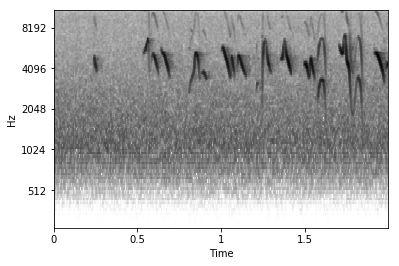

In [24]:
# First example (0->2s) in the TFRecord
feature_extractor.plot(someexamples[0]['data'])

## 1.5 - Check some other TFRecord

In [25]:
someothertfrecord = os.path.join(
    sometfrecord_path,
    random.sample(os.listdir(sometfrecord_path), 1)[0]
)
print(someothertfrecord)

/home/jul/data/birdclef2019/custom_subsets/subset_1571239571/features/positive/audio_wav_22050hz/gloflo1/XC9787.tf


### As examples

In [26]:
otherexamples = tf_utils.tfrecord2example(someothertfrecord, feature_extractor)

In [27]:
print(otherexamples)

[{'data': array([[  0.7863072 ,   0.9481722 ,   1.1396668 , ...,   0.33412907,
          0.29818764,  -0.08747938],
       [  0.47262496,   0.6344899 ,   0.82598454, ...,   0.02044672,
         -0.01549468,  -0.40116164],
       [ -0.25035456,  -2.1295362 ,  -4.836295  , ...,  -4.7193947 ,
         -3.925994  ,  -6.9351    ],
       ...,
       [ -9.901517  , -10.382177  , -10.916823  , ..., -10.130527  ,
        -10.027571  , -10.357012  ],
       [-10.236816  , -10.472573  , -10.691656  , ..., -10.817128  ,
        -10.952214  , -10.158127  ],
       [-10.603535  , -11.511169  , -12.231404  , ..., -11.377639  ,
        -10.693498  , -10.598938  ]], dtype=float32), 'filename': b'audio_wav_22050hz/gloflo1/XC9787.tf', 'labels': b'234', 'times': array([0.       , 1.9911112], dtype=float32)}, {'data': array([[ -0.7502113 ,  -1.440212  ,  -1.8585086 , ...,   0.47639686,
          0.12191418,  -0.40869924],
       [ -1.0638936 ,  -1.7538943 ,  -2.172191  , ...,   0.16271451,
         -0.191

### As input (features + one-hot encoded labels) to the model

In [28]:
subset_class_list = sorted(list(subset_label_set)) # labels are one-hot encoded according to this list

In [29]:
print(subset_class_list)

[96, 146, 234, 269, 394, 397, 541, 544, 615, 633]


In [30]:
example_as_input = tf_utils.tfrecord2data(someothertfrecord, feature_extractor, subset_class_list)

W1016 17:47:37.802033 139694107150144 deprecation.py:323] From /home/jul/dev/phaunos_ml/phaunos_ml/utils/tf_utils.py:143: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
# model_input is a list of tuple (<features>, <one-hot encoded labels>)
print(example_as_input)

[(array([[[  0.7863072 ,   0.9481722 ,   1.1396668 , ...,   0.33412907,
           0.29818764,  -0.08747938],
        [  0.47262496,   0.6344899 ,   0.82598454, ...,   0.02044672,
          -0.01549468,  -0.40116164],
        [ -0.25035456,  -2.1295362 ,  -4.836295  , ...,  -4.7193947 ,
          -3.925994  ,  -6.9351    ],
        ...,
        [ -9.901517  , -10.382177  , -10.916823  , ..., -10.130527  ,
         -10.027571  , -10.357012  ],
        [-10.236816  , -10.472573  , -10.691656  , ..., -10.817128  ,
         -10.952214  , -10.158127  ],
        [-10.603535  , -11.511169  , -12.231404  , ..., -11.377639  ,
         -10.693498  , -10.598938  ]]], dtype=float32), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)), (array([[[ -0.7502113 ,  -1.440212  ,  -1.8585086 , ...,   0.47639686,
           0.12191418,  -0.40869924],
        [ -1.0638936 ,  -1.7538943 ,  -2.172191  , ...,   0.16271451,
          -0.19176817,  -0.72238153],
        [ -7.5297613 ,  -3.3854785 , 

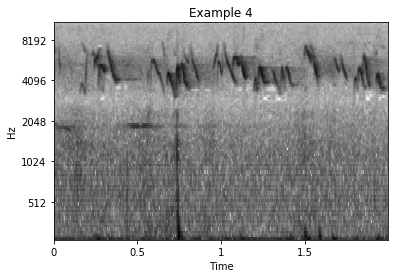

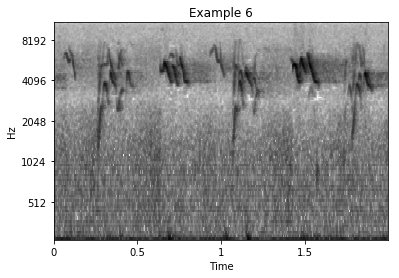

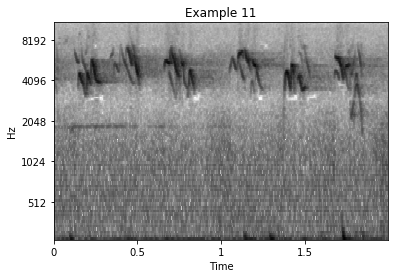

In [32]:
# Plot features for random examples from the selected file
ind = sorted(random.sample(range(len(example_as_input)),min(len(example_as_input), 3)))
for i in ind:    
    plt.figure()
    feature_extractor.plot(example_as_input[i][0][0])
    plt.title(f'Example {i}')

# 2 - Training

## 2.1 - Generate a train/valid split to monitor the performance on unseen data

In [33]:
from phaunos_ml.utils.dataset_utils import split_dataset

In [34]:
# This generates 2 files,
# /subset/path/subset_name.train.csv containing 80% of the data (training dataset)
# /subset/path/subset_name.test.csv containing 20% of the data (validation dataset, to select the model)
split_dataset(ROOT_PATH, subset_filename, audio_dirname='audio_wav_22050hz', test_size=0.2)

/home/jul/data/birdclef2019/custom_subsets/subset_1571239571/subset_1571239571.train.csv written
/home/jul/data/birdclef2019/custom_subsets/subset_1571239571/subset_1571239571.test.csv written


In [35]:
subset_filename

'/home/jul/data/birdclef2019/custom_subsets/subset_1571239571/subset_1571239571.csv'

## 2.2 - Count the number of batches in the train and valid sets

In [36]:
from phaunos_ml.utils.dataset_utils import dataset_stat_per_example
BATCH_SIZE = 32

In [37]:
# training set
n_train_batches, n_train_examples_per_class = dataset_stat_per_example(
    ROOT_PATH,
    subset_filename.replace('.csv', '.train.csv'),
    os.path.join(os.path.dirname(subset_filename), 'features/positive'),
    feature_extractor.feature_shape,
    subset_class_list,
    audio_dirname='audio_wav_22050hz',
    batch_size=BATCH_SIZE)
print(f'Num training batches: {n_train_batches} (i.e. {n_train_batches * BATCH_SIZE} examples)')
for c, n in zip(subset_class_list, n_train_examples_per_class):
    print(f'Class {c:2}: {n} examples')

Num training batches: 589 (i.e. 18848 examples)
Class 96: 1403 examples
Class 146: 3228 examples
Class 234: 2064 examples
Class 269: 947 examples
Class 394: 4138 examples
Class 397: 3447 examples
Class 541: 865 examples
Class 544: 1266 examples
Class 615: 449 examples
Class 633: 1041 examples


In [38]:
# valid set
n_valid_batches, n_valid_examples_per_class = dataset_stat_per_example(
    ROOT_PATH,
    subset_filename.replace('.csv', '.test.csv'),
    os.path.join(os.path.dirname(subset_filename), 'features/positive'),
    feature_extractor.feature_shape,
    subset_class_list,
    audio_dirname='audio_wav_22050hz',
    batch_size=BATCH_SIZE)
print(f'Num valid batches: {n_valid_batches} (i.e. {n_valid_batches * BATCH_SIZE} examples)')
for c, n in zip(subset_class_list, n_valid_examples_per_class):
    print(f'Class {c:2}: {n} examples')

Num valid batches: 135 (i.e. 4320 examples)
Class 96: 405 examples
Class 146: 909 examples
Class 234: 415 examples
Class 269: 227 examples
Class 394: 513 examples
Class 397: 1031 examples
Class 541: 203 examples
Class 544: 241 examples
Class 615: 51 examples
Class 633: 325 examples


## 2.3 - Write feature extraction and training config files

In [39]:
import json
import pathlib

EPOCHS = 10

In [40]:
# Write feature extractor's config file
feature_extractor.config2file(os.path.join(subset_dir, 'features/positive', 'featex_config.json'))

In [41]:
# Write training config file

training_dir = os.path.join(subset_dir, 'training')

training_config = {}
training_config['root_path'] = ROOT_PATH
training_config['feature_path'] = os.path.join(subset_dir, 'features/positive')
training_config['train_set_file'] = subset_filename.replace('.csv', '.train.csv')
training_config['audio_dirname'] = 'audio_wav_22050hz'
training_config['annotation_dirname'] = 'annotations'
training_config['n_train_batches'] = n_train_batches
training_config['batch_size'] = BATCH_SIZE
training_config['multilabel'] = False
training_config['epochs'] = EPOCHS
training_config['metrics'] = 'accuracy'
training_config['out_dir'] = training_dir
training_config['valid_set_file'] = subset_filename.replace('.csv', '.test.csv')
training_config['n_valid_batches'] = n_valid_batches

training_config_path = os.path.join(training_dir, 'training_config.json')
pathlib.Path(training_dir).mkdir(parents=True, exist_ok=True)

with open(training_config_path, 'w') as training_config_file:
    json.dump(training_config, training_config_file)

## 2.4 - Train

In [42]:
from phaunos_ml import train

In [43]:
train.process(training_config_path)

W1016 17:49:16.916447 139694107150144 deprecation.py:506] From /home/jul/.miniconda3/envs/phaunos_ml/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mels (InputLayer)            [(32, 1, 128, 344)]       0         
_________________________________________________________________
l1_conv (Conv2D)             (32, 32, 126, 342)        288       
_________________________________________________________________
l1_bn (BatchNormalization)   (32, 32, 126, 342)        96        
_________________________________________________________________
l1 (Activation)              (32, 32, 126, 342)        0         
_________________________________________________________________
l1_mp (MaxPooling2D)         (32, 32, 62, 170)         0         
_________________________________________________________________
l2_conv (Conv2D)             (32, 32, 58, 166)         25600     
_________________________________________________________________
l2_bn (BatchNormalization)   (32, 32, 58, 166)         96    